# Fetching Tweets using Tweepy

### Import Libraries


Installing vaderSentiment for sentimental Analysisi



In [20]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import tweepy
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
stop = stopwords.words('english')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
import re
import matplotlib.pyplot as plt
from matplotlib.cm import Reds, Greens, Purples, Greys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
import time

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Variables that contains the credentials to access Twitter API
access_token='1394853041178873858-x6pAsbKjdYz0XDuV11sXNDI5BpaLGm'
access_token_secret='lbCEyVRKK4Pq6rGOm8G9coMC35gkUn0qDwyPIQQZrMavs'
consumer_key='IeYEcmFchOieMPWKcxum7md57'
consumer_secret='71XjcZIBC8UkYgf0XkSJAdOi9NdJbE7bjiRnrfHX3a5IW1iPh5'


# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)   #api key and secret 
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth)
    return api


# Create API object
api = connect_to_twitter_OAuth()

#### Getting Tweets from different crypto currencies twitter handels

In [25]:
crypto_list=['@ethereum','@litecoin','@Tether_to','@dogecoin','@Polkadot','@btc',"@Cardano"]

In [19]:
# Array to hold tweet data
tweet_list = []
# Iterate through all the crypto_list
for crypto in crypto_list:
    # Bring out the 200 tweets
    crypto_tweets = api.user_timeline(screen_name=crypto)     # 200 is the limit by tweeter 
    time.sleep(1)
    # Loop through the 200 tweets
    for tweet in crypto_tweets:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        # append attributes to list
        tweet_list.append({'crypto':crypto,
                          'tweet_id':tweet_id, 
                          'text':text, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
        

In [26]:
tweet_data=pd.DataFrame(tweet_list)

In [27]:
tweet_data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,@ethereum,1639200431288074241,"RT @fredriksvantes: Hi all👋, there's news from...",0,104,2023-03-24 09:40:12+00:00,Twitter Web App,NaN,None,104,0
1,@ethereum,1638302754316664832,RT @erc4337: Wondering if your amazing idea is...,0,86,2023-03-21 22:13:09+00:00,Twitter Web App,NaN,None,86,0
2,@ethereum,1636746669139320833,RT @EF_ESP: 🚨 Reminder: The Account Abstractio...,0,130,2023-03-17 15:09:49+00:00,Twitter Web App,NaN,None,130,0
3,@ethereum,1636329287862059008,RT @EFNextBillion: We believe they’re out ther...,0,135,2023-03-16 11:31:18+00:00,Twitter Web App,NaN,None,135,0
4,@ethereum,1634606891371298816,RT @TimBeiko: Goerli Shapella Client Updates 👀...,0,100,2023-03-11 17:27:07+00:00,Twitter Web App,NaN,None,100,0


In [28]:
tweet_data.shape

(139, 11)

In [29]:
tweet_data.to_csv('Tweets.csv',index=None)

## Exploring the Data

In [30]:
data=tweet_data.copy()

In [31]:
source=data.source.value_counts()
source

Twitter Web App        45
Twitter for iPhone     29
TweetDeck              25
Hootsuite Inc.         19
Buffer                 15
BTC Times Bot           3
Twitter for Android     2
HubSpot                 1
Name: source, dtype: int64

In [32]:

trace=go.Pie(labels=source.index,values=source,showlegend=False,hole=0.33,text=[str(round(i*100,3))+'%' for i in source/sum(source)],hovertext='Source',
            hoverinfo='label+text',textinfo='text+label'
            )
layout=go.Layout(title="Which Device People are using?")
fig=go.Figure(data=[trace],layout=layout)
fig.show()

##### Observation:
- People prefer TweetDeck or Web App. 

#### Most Retweets and Favorites

In [33]:
source=data.groupby('crypto').agg(sum)[['retweet_count','favorite_count']]

In [34]:
fig=go.Figure()
fig.add_bar(x=source.index,y=source.retweet_count,name='Retweet Count')
fig.add_bar(x=source.index,y=source.favorite_count,name='Favorite Count')

#### Most used Hashtags

In [35]:
def hashtag_extract(x):                # extracting hastags 
    hashtags = []
    ht = re.findall(r"#(\w+)", x)
    hashtags.extend(ht)                  
    if hashtags==[]:                     # if no hastags are used in text 
        return ''
    return hashtags                     # if hastags are used 
    

In [36]:
tags=[hashtag_extract(x) for  x in data.text]
tags

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ['ACDE'],
 '',
 '',
 ['Litecoin'],
 '',
 '',
 ['Litecoin'],
 '',
 '',
 '',
 ['Litecoin', 'crypto'],
 '',
 ['Litecoin'],
 '',
 '',
 '',
 ['ApexLedgends'],
 ['MWEB', 'Litecoin'],
 ['SaturdayVibes'],
 '',
 '',
 ['tether'],
 '',
 ['tether'],
 ['Bitcoin', 'Tether', 'LVGA', 'LuganoPlanB'],
 ['LuganoPlanB', 'Bitcoin', 'Tether'],
 ['ParisBlockchain'],
 ['tether'],
 '',
 ['lugano'],
 ['XAUT', 'Bitcoin'],
 '',
 '',
 ['DeFi'],
 ['tether'],
 ['tether'],
 ['tether'],
 '',
 '',
 '',
 '',
 '',
 ['Dogecoin'],
 ['Dogecoin'],
 '',
 ['DogeFam'],
 ['Dogecoin', 'Doge'],
 '',
 '',
 ['DogeFam', 'Dogemas'],
 ['Dogecoin', 'DogeFam'],
 '',
 ['Dogeathon'],
 '',
 '',
 '',
 ['Dogeathon', 'Dogecoin'],
 ['HackTheDoge'],
 ['Dogeathon'],
 ['Dogeathon', 'DoOnlyGoodEveryday', 'HackTh'],
 '',
 ['PolkadotCommunityCall'],
 '',
 '',
 ['Polkadot', 'Polkadot'],
 '',
 '',
 ['PolkadotDigest', 'Polkadot'],
 '',
 ['PolkadotDigest', 'Po

In [37]:
all_tags=[]
for tag in tags:
    if tag!='':                                         # extracting only hastags
        all_tags.extend(tag)
all_tags

['ACDE',
 'Litecoin',
 'Litecoin',
 'Litecoin',
 'crypto',
 'Litecoin',
 'ApexLedgends',
 'MWEB',
 'Litecoin',
 'SaturdayVibes',
 'tether',
 'tether',
 'Bitcoin',
 'Tether',
 'LVGA',
 'LuganoPlanB',
 'LuganoPlanB',
 'Bitcoin',
 'Tether',
 'ParisBlockchain',
 'tether',
 'lugano',
 'XAUT',
 'Bitcoin',
 'DeFi',
 'tether',
 'tether',
 'tether',
 'Dogecoin',
 'Dogecoin',
 'DogeFam',
 'Dogecoin',
 'Doge',
 'DogeFam',
 'Dogemas',
 'Dogecoin',
 'DogeFam',
 'Dogeathon',
 'Dogeathon',
 'Dogecoin',
 'HackTheDoge',
 'Dogeathon',
 'Dogeathon',
 'DoOnlyGoodEveryday',
 'HackTh',
 'PolkadotCommunityCall',
 'Polkadot',
 'Polkadot',
 'PolkadotDigest',
 'Polkadot',
 'PolkadotDigest',
 'Polkadot',
 'Why',
 'OpenGov',
 'PolkadotDigest',
 'Polkadot',
 'ParisBlockchainWeek',
 'ParisBlockchainWeek',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'CostaRica',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Nostrica',
 'Nostrica',
 'Cardano',
 'ProjectCatalyst',
 'cardano

In [38]:
tags_vc={tag:0 for tag in set(all_tags)}
tags_vc                                                   # all the hastags that are used 

{'Doge': 0,
 'HackTh': 0,
 'CardanoF': 0,
 'Polkadot': 0,
 'summerschool': 0,
 'Dogeathon': 0,
 'Why': 0,
 'MWEB': 0,
 'Web3': 0,
 'SaturdayVibes': 0,
 'NFT': 0,
 'HackTheDoge': 0,
 'Dogecoin': 0,
 'tether': 0,
 'ApexLedgends': 0,
 'OpenGov': 0,
 'CardanoCommunity': 0,
 'DeFi': 0,
 'ACDE': 0,
 'cardano': 0,
 'PolkadotCommunityCall': 0,
 'DogeFam': 0,
 'LVGA': 0,
 'XAUT': 0,
 'crypto': 0,
 'Tether': 0,
 'CostaRica': 0,
 'lugano': 0,
 'CardanoSummit2023': 0,
 'LuganoPlanB': 0,
 'Bitcoin': 0,
 'ParisBlockchain': 0,
 'PBW2023': 0,
 'Blockchain': 0,
 'Litecoin': 0,
 'DoOnlyGoodEveryday': 0,
 'Dogemas': 0,
 'Cardano': 0,
 'PolkadotDigest': 0,
 'Nostrica': 0,
 'ProjectCatalyst': 0,
 'ParisBlockchainWeek': 0}

In [39]:
for tweet in data.text:
    ht = re.findall(r"#(\w+)", tweet)
    if ht!=[]:
        for tag in ht:                             #  no of time hastag was used 
            tags_vc[tag]+=1

In [40]:
tags_vc_sorted=dict(sorted(tags_vc.items(),key= lambda x:x[1],reverse=True))

In [41]:
tags_vc_sorted

{'Bitcoin': 14,
 'tether': 6,
 'Polkadot': 5,
 'Dogecoin': 5,
 'Litecoin': 5,
 'Dogeathon': 4,
 'CardanoCommunity': 3,
 'DogeFam': 3,
 'Cardano': 3,
 'PolkadotDigest': 3,
 'Tether': 2,
 'CardanoSummit2023': 2,
 'LuganoPlanB': 2,
 'Blockchain': 2,
 'Nostrica': 2,
 'ParisBlockchainWeek': 2,
 'Doge': 1,
 'HackTh': 1,
 'CardanoF': 1,
 'summerschool': 1,
 'Why': 1,
 'MWEB': 1,
 'Web3': 1,
 'SaturdayVibes': 1,
 'NFT': 1,
 'HackTheDoge': 1,
 'ApexLedgends': 1,
 'OpenGov': 1,
 'DeFi': 1,
 'ACDE': 1,
 'cardano': 1,
 'PolkadotCommunityCall': 1,
 'LVGA': 1,
 'XAUT': 1,
 'crypto': 1,
 'CostaRica': 1,
 'lugano': 1,
 'ParisBlockchain': 1,
 'PBW2023': 1,
 'DoOnlyGoodEveryday': 1,
 'Dogemas': 1,
 'ProjectCatalyst': 1}

## Cleaning the Tweet Data

#### Removing user handle 

In [42]:
# removing user handle 
data['tidy_tweet'] = data['text'].replace(to_replace ='(@[\w]+)', value ='', regex = True)     # removing mentions 
data['tidy_tweet'] = data['tidy_tweet'].replace(to_replace =('RT'), value ='',regex = True)       #removing RT
data['tidy_tweet']

0       : Hi all👋, there's news from  Foundation's Bu...
1       : Wondering if your amazing idea is aligned w...
2       : 🚨 Reminder: The Account Abstraction Grants ...
3       : We believe they’re out there. They have lev...
4       : Goerli Shapella Client Updates 👀\n\n new ve...
                             ...                        
134     : Bonjour from ! 👋\n\nWe’re proud to announce...
135     : 4th #summerschool "Deep Dive into #Blockcha...
136     : 🚨 Attention #CardanoCommunity! 🚨\nOur initi...
137    Check out the latest #CardanoCommunity news an...
138     :  and the UN team up to revolutionize humani...
Name: tidy_tweet, Length: 139, dtype: object

In [43]:
# Before
tweet_data['text'][:2]

0    RT @fredriksvantes: Hi all👋, there's news from...
1    RT @erc4337: Wondering if your amazing idea is...
Name: text, dtype: object

In [44]:
# After
data['tidy_tweet'][:2]

0     : Hi all👋, there's news from  Foundation's Bu...
1     : Wondering if your amazing idea is aligned w...
Name: tidy_tweet, dtype: object

#### Remove any links from the tweet

In [45]:
#remove any links from the tweet: Links not required for performing sentiment analysis.
data['tidy_tweet'] = data['tidy_tweet'].str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex=True)    # removing all the web links 

In [46]:
# Before
tweet_data['text'][3]

'RT @EFNextBillion: We believe they’re out there. They have levers with which they intend to move the world, and Ethereum could be their ful…'

In [47]:
# After
data['tidy_tweet'][3]

' : We believe they’re out there. They have levers with which they intend to move the world, and Ethereum could be their ful…'

#### Remove special characters, numbers, punctuations:

In [48]:
# remove special characters, numbers, punctuations: None of them would add any value to the sentiment score.
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z]+", " ")

In [49]:
data['tidy_tweet'][0]

' Hi all there s news from Foundation s Bug Bounty Program All Shapella related bug '

In [50]:
tweet_data.text[0]

"RT @fredriksvantes: Hi all👋, there's news from @Ethereum Foundation's Bug Bounty Program: https://t.co/MaBGlzTJ9S\n\nAll Shapella-related bug…"

#### Tokenising and removing Stop Words

In [51]:
data["tidy_tweet"] = data["tidy_tweet"].str.lower()                              # lowercase the data 
data["tidy_tweet"] = data["tidy_tweet"].str.split()                               # tokenizing the data
data['tidy_tweet']=data['tidy_tweet'].apply(lambda x: [item for item in x if item not in stop])    #removing stopwords
data["tidy_tweet"]

0      [hi, news, foundation, bug, bounty, program, s...
1      [wondering, amazing, idea, aligned, account, a...
2      [reminder, account, abstraction, grants, round...
3      [believe, levers, intend, move, world, ethereu...
4      [goerli, shapella, client, updates, new, versi...
                             ...                        
134        [bonjour, proud, announce, partnership, laun]
135    [th, summerschool, deep, dive, blockchain, ord...
136    [attention, cardanocommunity, initial, episode...
137    [check, latest, cardanocommunity, news, topics...
138    [un, team, revolutionize, humanitarian, aid, r...
Name: tidy_tweet, Length: 139, dtype: object

In [52]:
data.text[0]

"RT @fredriksvantes: Hi all👋, there's news from @Ethereum Foundation's Bug Bounty Program: https://t.co/MaBGlzTJ9S\n\nAll Shapella-related bug…"

In [53]:
# After
data['tidy_tweet'][0]

['hi',
 'news',
 'foundation',
 'bug',
 'bounty',
 'program',
 'shapella',
 'related',
 'bug']

In [54]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

data['tidy_tweet'] = data.apply(rejoin_words, axis=1)


In [55]:
data['tidy_tweet'][0]

'hi news foundation bug bounty program shapella related bug'

#### Applying Lemmatization

In [56]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [57]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data['tidy_tweet'] = data['tidy_tweet'].apply(lemmatize_text)

In [58]:
data['tidy_tweet']

0      [hi, news, foundation, bug, bounty, program, s...
1      [wondering, amazing, idea, aligned, account, a...
2      [reminder, account, abstraction, grant, round,...
3      [believe, lever, intend, move, world, ethereum...
4      [goerli, shapella, client, update, new, versio...
                             ...                        
134        [bonjour, proud, announce, partnership, laun]
135    [th, summerschool, deep, dive, blockchain, ord...
136    [attention, cardanocommunity, initial, episode...
137    [check, latest, cardanocommunity, news, topic,...
138    [un, team, revolutionize, humanitarian, aid, r...
Name: tidy_tweet, Length: 139, dtype: object

In [59]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

data['tidy_tweet'] = data.apply(rejoin_words, axis=1)

In [60]:
data['tidy_tweet']

0      hi news foundation bug bounty program shapella...
1      wondering amazing idea aligned account abstrac...
2      reminder account abstraction grant round still...
3      believe lever intend move world ethereum could...
4      goerli shapella client update new version requ...
                             ...                        
134              bonjour proud announce partnership laun
135    th summerschool deep dive blockchain orderly p...
136    attention cardanocommunity initial episode blo...
137    check latest cardanocommunity news topic aroun...
138    un team revolutionize humanitarian aid refugee...
Name: tidy_tweet, Length: 139, dtype: object

#### Function for Cleaning

In [61]:
# This will only be used in for single tweet
def rejoin_words_text(row):
    my_list = row['Text']
    joined_words = ( " ".join(my_list))
    return joined_words

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

def cleanText(text):
    text = pd.DataFrame({'Orig':[text]})
    text['Text'] = text.Orig.replace(to_replace ='(@[\w]+)', value ='', regex = True) 
    text.Text = text.Text.replace(to_replace =('RT'), value ='',regex = True) 
    text.Text = text.Text.str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex=True)
    text.Text = text.Text.str.replace("[^a-zA-Z]+", " ")
    text.Text = text.Text.str.lower()
    text.Text = text.Text.str.split()
    text.Text = text.Text.apply(lambda x: [item for item in x if item not in stop])
    text.Text = text.apply(rejoin_words_text, axis=1)
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text.Text = text.Text.apply(lemmatize_text)
    text.Text = text.apply(rejoin_words_text, axis=1)
    return text.Text[0]

### Check the Sentiment using VADER

In [62]:
analyzer = SentimentIntensityAnalyzer()

In [63]:
out={'neg':[],'neu':[],'pos':[],'compound':[]}

In [64]:
for i in range(data.shape[0]):
    vader_out=analyzer.polarity_scores(data.tidy_tweet[i])
    for key in vader_out.keys():
        out[key].append(vader_out[key])

In [65]:
for key in out.keys():
    data[key]=out[key]

In [66]:
source=data.groupby('crypto').agg('mean')
source

,tweet_id,favorite_count,retweet_count,reply_to_status,retweets,favorites,neg,neu,pos,compound
crypto,,,,,,,,,,
@Cardano,1.638367e+18,38.368421,49.315789,NaN,49.315789,38.368421,0.039421,0.775211,0.185368,0.231095
@Polkadot,1.638399e+18,148.500000,32.550000,1.638006e+18,32.550000,148.500000,0.019450,0.845650,0.134900,0.174065
@Tether_to,1.636459e+18,101.100000,80.550000,NaN,80.550000,101.100000,0.031600,0.836450,0.031950,0.026515
@btc,1.638815e+18,14.300000,269.100000,NaN,269.100000,14.300000,0.077000,0.766300,0.106750,0.072995
@dogecoin,1.607055e+18,2133.950000,481.250000,1.608610e+18,481.250000,2133.950000,0.017500,0.570500,0.362000,0.441240
@ethereum,1.632069e+18,0.000000,155.150000,NaN,155.150000,0.000000,0.000000,0.816750,0.183250,0.302105
@litecoin,1.638302e+18,262.600000,48.250000,1.638918e+18,48.250000,262.600000,0.029800,0.756150,0.114050,0.140290


In [67]:
source=data.groupby('crypto').agg('mean')
fig=go.Figure()
for crypto in data.crypto.unique():
    fig.add_bar(x=['Negative','Neutral','Positive','Compound'],y=list(source[source.index==crypto][out.keys()].values[0]),name=crypto)
fig.update_layout(title='Average Sentiment Across type of cryptocurrencies')
fig.show()

#Roberta Pre Trained Model

In [68]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.4 MB/s eta 0:00:00


In [69]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [70]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [71]:
exe="rohit is bad person"

In [72]:
analyzer.polarity_scores(exe)

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [73]:
def polarity_score_roberta(exe):
  encoded_text=tokenizer("exe",return_tensors="pt")
  output=model(**encoded_text)
  roberta=output[0][0].detach().numpy()
  roberta=softmax(roberta)
  roberta_dict={"r_neg":roberta[0],
                "r_neu":roberta[1],
                "r_pos":roberta[2]}
  return(roberta_dict)

In [74]:
out_r={'r_neg':[],'r_neu':[],'r_pos':[]}

In [75]:

for i in range(data.shape[0]):
  
    roberta_out=polarity_score_roberta(data.tidy_tweet[i])
    for key in roberta_out.keys():
        out_r[key].append(roberta_out[key])

In [76]:
for key in out_r.keys():
    data[key]=out_r[key]

In [77]:
source_r=data.groupby('crypto').agg('mean')
fig=go.Figure()
for crypto in data.crypto.unique():
    fig.add_bar(x=['r_neg','r_neu','r_pos'],y=list(source_r[source_r.index==crypto][out_r.keys()].values[0]),name=crypto)
fig.update_layout(title='Average Sentiment Across type of cryptocurrencies using roberta-base-sentiment')
fig.show()

In [78]:
from transformers import pipeline
sent_pipeline=pipeline("sentiment-analysis",)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [79]:
exe

'rohit is bad person'

In [80]:
sent_pipeline("bitcoin is going to fall today but it will rise")

[{'label': 'POSITIVE', 'score': 0.9869535565376282}]

In [81]:
def polarity_score_bert(exe):
  bert_dict={"label":sent_pipeline[0]
                }
  return(bert_dict)

In [82]:
labels=[]
for i in range(data.shape[0]):
  
    bert_out=sent_pipeline(data.tidy_tweet[i])
    labels.append(bert_out[0])

In [83]:
data=pd.concat([data,pd.DataFrame(labels)],axis=1)

In [84]:
data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,...,tidy_tweet,neg,neu,pos,compound,r_neg,r_neu,r_pos,label,score
0,@ethereum,1639200431288074241,"RT @fredriksvantes: Hi all👋, there's news from...",0,104,2023-03-24 09:40:12+00:00,Twitter Web App,NaN,None,104,...,hi news foundation bug bounty program shapella...,0.0,1.000,0.000,0.0000,0.21761,0.604207,0.178183,NEGATIVE,0.999423
1,@ethereum,1638302754316664832,RT @erc4337: Wondering if your amazing idea is...,0,86,2023-03-21 22:13:09+00:00,Twitter Web App,NaN,None,86,...,wondering amazing idea aligned account abstrac...,0.0,0.541,0.459,0.8176,0.21761,0.604207,0.178183,POSITIVE,0.982647
2,@ethereum,1636746669139320833,RT @EF_ESP: 🚨 Reminder: The Account Abstractio...,0,130,2023-03-17 15:09:49+00:00,Twitter Web App,NaN,None,130,...,reminder account abstraction grant round still...,0.0,0.815,0.185,0.3612,0.21761,0.604207,0.178183,NEGATIVE,0.980683
3,@ethereum,1636329287862059008,RT @EFNextBillion: We believe they’re out ther...,0,135,2023-03-16 11:31:18+00:00,Twitter Web App,NaN,None,135,...,believe lever intend move world ethereum could...,0.0,1.000,0.000,0.0000,0.21761,0.604207,0.178183,NEGATIVE,0.973989
4,@ethereum,1634606891371298816,RT @TimBeiko: Goerli Shapella Client Updates 👀...,0,100,2023-03-11 17:27:07+00:00,Twitter Web App,NaN,None,100,...,goerli shapella client update new version requ...,0.0,0.833,0.167,0.2023,0.21761,0.604207,0.178183,NEGATIVE,0.949171


In [85]:
new=data.groupby("crypto")["label"].value_counts()
new

crypto      label   
@Cardano    NEGATIVE    11
            POSITIVE     8
@Polkadot   NEGATIVE    12
            POSITIVE     8
@Tether_to  POSITIVE    11
            NEGATIVE     9
@btc        NEGATIVE    16
            POSITIVE     4
@dogecoin   POSITIVE    15
            NEGATIVE     5
@ethereum   NEGATIVE    10
            POSITIVE    10
@litecoin   POSITIVE    12
            NEGATIVE     8
Name: label, dtype: int64

In [86]:
pos_pip=[]
neg_pip=[]
for  i in range(len(new.values)):
  if i%2==0:
    pos_pip.append(new.values[i])
  else:
    neg_pip.append(new.values[i])
pos_pip

[11, 12, 11, 16, 15, 10, 12]

In [87]:
crypto_name=[]
for  i in range(len(new.index.get_level_values('crypto'))):
  if i%2==0:
    crypto_name.append(new.index.get_level_values('crypto')[i])

crypto_name

['@Cardano',
 '@Polkadot',
 '@Tether_to',
 '@btc',
 '@dogecoin',
 '@ethereum',
 '@litecoin']

In [88]:
trans=pd.DataFrame(data=list(zip(crypto_name,pos_pip,neg_pip)),columns=["crypto_name","pos_pip","neg_pip"])
trans

,crypto_name,pos_pip,neg_pip
0,@Cardano,11,8
1,@Polkadot,12,8
2,@Tether_to,11,9
3,@btc,16,4
4,@dogecoin,15,5
5,@ethereum,10,10
6,@litecoin,12,8


<Axes: xlabel='crypto'>

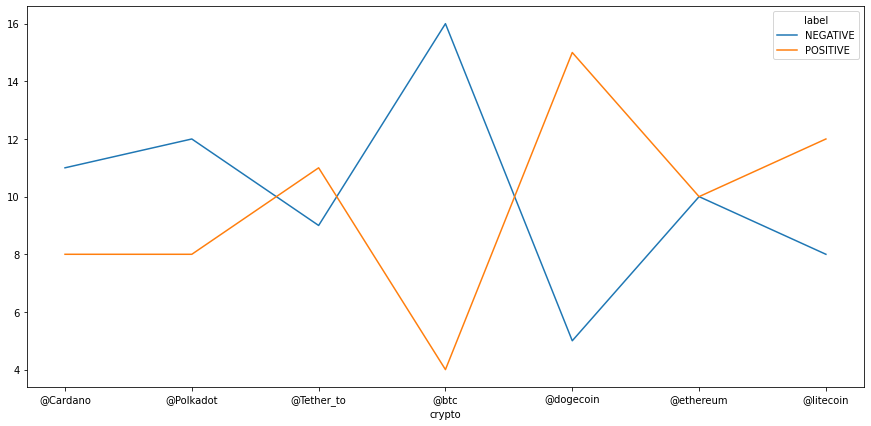

In [89]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
data.groupby("crypto")["label"].value_counts().unstack().plot(ax=ax)


#### Wordcloud based on the hashtags

In [90]:
def word_cloud(wd_list,color):
    plt.figure(figsize=(10,15))
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(max_font_size=None,stopwords=stopwords, background_color='#fcf4ee', collocations=False,colormap =color,
                  width=750, height=750).generate(all_words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

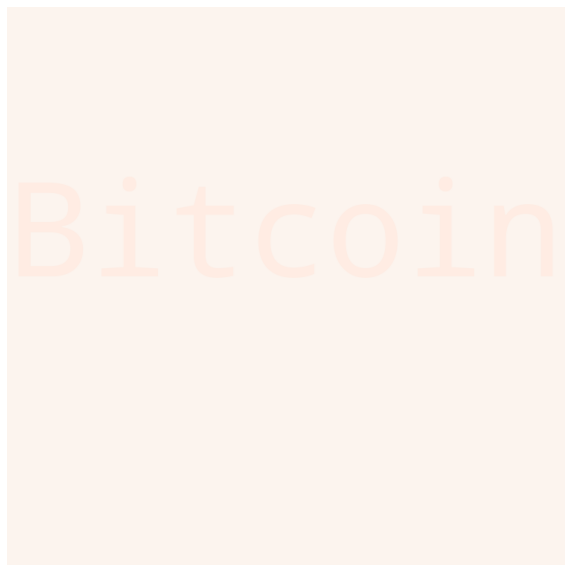

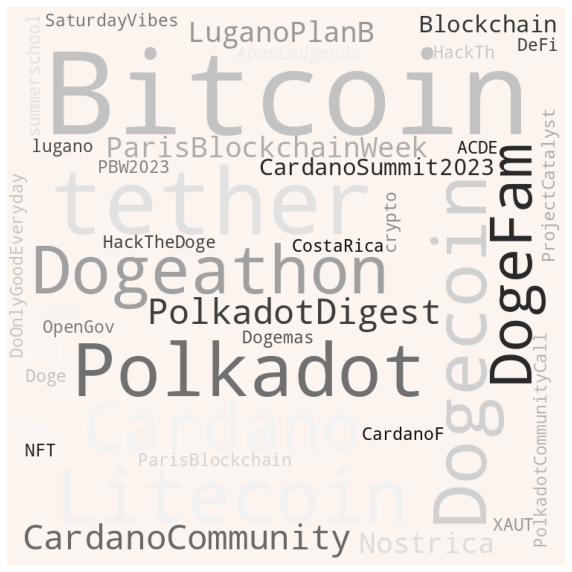

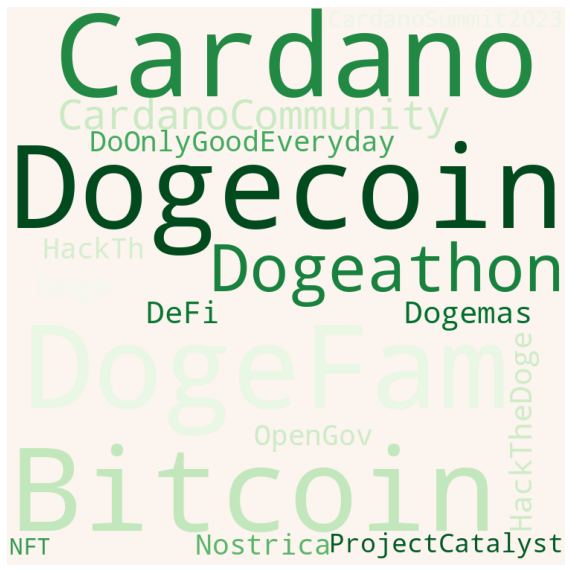

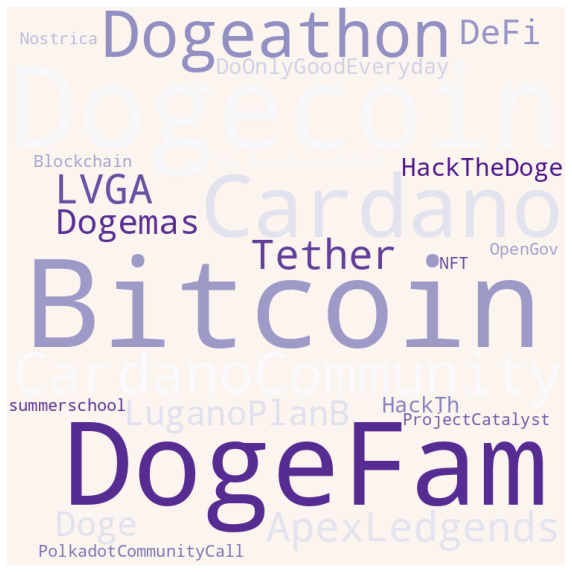

In [91]:
for key in out.keys():
    pos_tags = data['text'][data[key]>0.2].apply(hashtag_extract)
    sentiment_tags=[]
    for tag in pos_tags:
        if tag!='':
            sentiment_tags.extend(tag)
    color={'neg':Reds,'pos':Greens,'neu':Greys,'compound':Purples}
    word_cloud(sentiment_tags,color[key])